In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/c/cifar-10/data?select=test.7z')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cszzzz
Your Kaggle Key: ··········


100%|██████████| 715M/715M [00:03<00:00, 193MB/s]



Extracting archive ./cifar-10/cifar-10.zip to ./cifar-10


In [ ]:
!ls

cifar-10  sample_data


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 31.8 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/cifar-10/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10  sample_data  train


## Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames =os.listdir('/content/train')
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['7251.png', '47955.png', '31267.png', '35553.png', '41682.png']
['24525.png', '35394.png', '38764.png', '45170.png', '44649.png']


##Labels processing

In [ ]:
labels_df = pd.read_csv('/content/cifar-10/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 44461]

,id,label
44460,44461,truck


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
# encoding labels
labels_dictionary ={'airplane':0, 'automobile':1,'bird':2,'cat':3, 'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels =[labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])

[6, 9, 9, 4, 1]


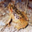

In [ ]:
# displaying the sample images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list)

## Image Processing

In [ ]:
#Convert image to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image= Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
data[0]

In [ ]:
#convert imges and labels to numpy array
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
# Splitting data into train and testing
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Data Normalization (scaling the data)
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [ ]:
print(X_train_scaled)

**Building the neural network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes =10

# setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.1521 - loss: 2.2696 - val_acc: 0.2050 - val_loss: 2.0909
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.2250 - loss: 2.0656 - val_acc: 0.2488 - val_loss: 2.0152
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2473 - loss: 2.0124 - val_acc: 0.2573 - val_loss: 1.9626
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2564 - loss: 1.9789 - val_acc: 0.2505 - val_loss: 1.9742
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.2555 - loss: 1.9695 - val_acc: 0.2503 - val_loss: 1.9924
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.2505 - loss: 1.9701 - val_acc: 0.2650 - val_loss: 1.9348
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2529 - loss: 1.9561 - val_acc: 0.2550 - val_loss: 1.9280
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.2769 - loss: 1.9289 - val_acc: 0.2870 - val_loss: 1.9009
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**RestNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50 (weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics =['acc'] )

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 344ms/step - acc: 0.3260 - loss: 2.0637 - val_acc: 0.7318 - val_loss: 0.9299
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 411s 342ms/step - acc: 0.6753 - loss: 1.0722 - val_acc: 0.8835 - val_loss: 0.4845
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - acc: 0.7881 - loss: 0.7797 - val_acc: 0.9135 - val_loss: 0.3667
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 332ms/step - acc: 0.8604 - loss: 0.5864 - val_acc: 0.9360 - val_loss: 0.2647
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 374s 333ms/step - acc: 0.9042 - loss: 0.4538 - val_acc: 0.9370 - val_loss: 0.2519
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 341ms/step - acc: 0.9324 - loss: 0.3582 - val_acc: 0.9392 - val_loss: 0.2264
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 342ms/step - acc: 0.9508 - loss: 0.2847 - val_acc: 0.9367 - val_loss: 0.2300
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 342ms/step - acc: 0.9592 - loss: 0.2392 - val_acc: 0.9317 - val_loss: 0.2461
Epoch 9/

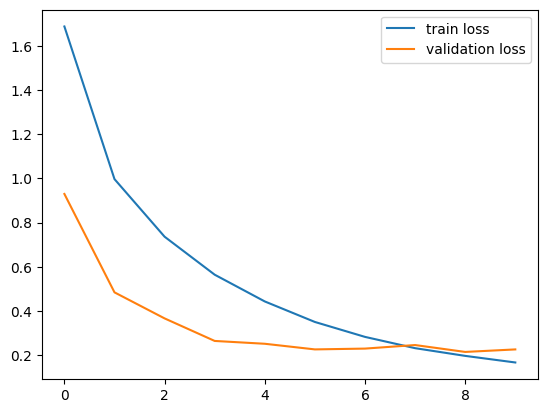

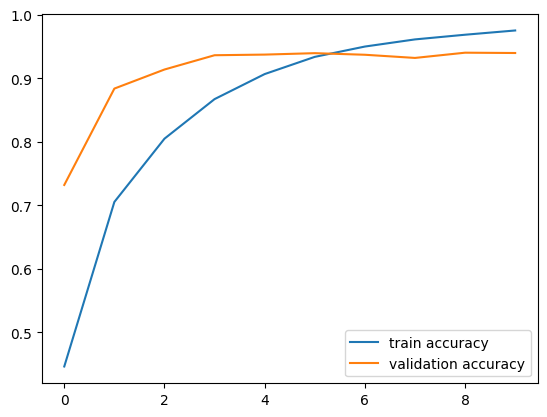

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label ='train loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label ='train accuracy')
plt.plot(h.history['val_acc'], label= 'validation accuracy')
plt.legend()
plt.show()